<a href="https://colab.research.google.com/github/atharvrathore100/machine-learning/blob/master/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras

from keras.utils import plot_model
#plot_model(model, to_file='model.png')

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
batch_size = 240
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
keras.layers.AveragePooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')

model.add(Conv2D(16, (7, 7), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
keras.layers.AveragePooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 8)         136       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 16)        6288      
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5776)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                369728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/1





60000/60000 [==============================] - 16s 272us/step - loss: 0.3694 - acc: 0.8869 - val_loss: 0.0770 - val_acc: 0.9745


In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07698381619032006
Test accuracy: 0.9745


In [0]:
model.save("CNN.h5")

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 15s 327us/step - loss: 0.0726 - acc: 0.9816 - val_loss: 0.0633 - val_acc: 0.9857
Epoch 2/10
45000/45000 [==============================] - 15s 329us/step - loss: 0.0666 - acc: 0.9840 - val_loss: 0.0634 - val_acc: 0.9859
Epoch 3/10
45000/45000 [==============================] - 15s 323us/step - loss: 0.0655 - acc: 0.9844 - val_loss: 0.0665 - val_acc: 0.9841
Epoch 4/10
45000/45000 [==============================] - 15s 336us/step - loss: 0.0725 - acc: 0.9827 - val_loss: 0.0757 - val_acc: 0.9853
Epoch 5/10
45000/45000 [==============================] - 15s 334us/step - loss: 0.0696 - acc: 0.9830 - val_loss: 0.0663 - val_acc: 0.9859
Epoch 6/10
45000/45000 [==============================] - 15s 327us/step - loss: 0.0687 - acc: 0.9838 - val_loss: 0.0777 - val_acc: 0.9866
Epoch 7/10
45000/45000 [==============================] - 15s 323us/step - loss: 0.0666 - acc: 0.9840 - val_loss: 0.

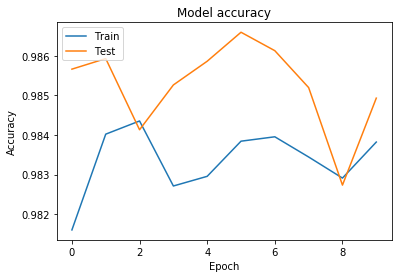

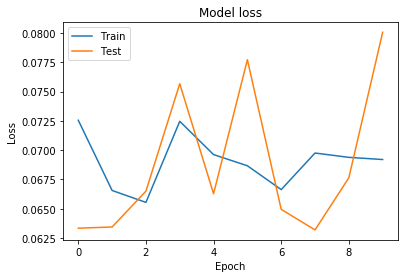

In [0]:
plot_model(model)

import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
